## Homework 1: Solution for Question 16 and above

### Perceptron Learning Algorithm Experiment
Yu-Teng Li, Fall 2020 Machine Learning Foundation

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.style.use('ggplot') # For styling purpose

In [2]:
# Read data in, append 1.0 at the beginning of the weight vector to factor in threshold value.
with open('hw1_data.dat', 'r') as frame:
    df = []
    for line in frame:
        df.append([1.0] + [float(x) for x in line.split()])
df = np.array(df)

print("Dataframe (df) has 10 + 1 (for threshold) features, 1 label at each row:", df.shape)

Dataframe (df) has 10 + 1 (for threshold) features, 1 label at each row: (100, 12)


In [3]:
# PLA driver function. Takes in a random seed, threshold, and the scale of features
def perceptron(seed = 0, data = None, threshold = None):
    random.seed(seed)
    w = np.zeros(11)
    safe_count, update_times = 0, 0
    while True:
        if safe_count == 500:  break
        index = np.random.randint(0, 99)
        target = np.append([threshold], data[index][1:]) if (threshold != None) else data[index]
        inner_product = np.dot(w, target[:-1])
        sign = np.sign(inner_product) if inner_product != 0 else -1
        if sign != target[11]:
            w += np.multiply(target[:-1], target[11]) 
            update_times += 1
        else: 
            safe_count += 1
    return update_times, w

In [4]:
# "Iterator" function for PLA.
print_factor = 100
def pla_driver(iteration = 1000, threshold = None, scale = None, data=df):
    updates, vector_w0 = [], []
    print_counter = 0
    if scale != None:
        for data_row in data:
            data_row = np.multiply(data_row[:-1], scale) + data_row[11]
    for i in range(iteration):
        update_times, weight = perceptron(seed=i, data=data, threshold=threshold)
        if not print_counter % print_factor:
            print("Iteration {:d} --- Updated {:d} times".format(i, update_times))
            print_counter = 0
        updates.append(update_times)
        vector_w0.append(weight[0])
        print_counter += 1
    return updates, vector_w0

### Question 16, 17

In [5]:
# Question 16, 17: Iterate over PLA for 1000 times, each time print out random result.
q16_updates, q16_w0 = pla_driver()

Iteration 0 --- Updated 11 times
Iteration 100 --- Updated 7 times
Iteration 200 --- Updated 11 times
Iteration 300 --- Updated 10 times
Iteration 400 --- Updated 12 times
Iteration 500 --- Updated 12 times
Iteration 600 --- Updated 7 times
Iteration 700 --- Updated 12 times
Iteration 800 --- Updated 11 times
Iteration 900 --- Updated 11 times


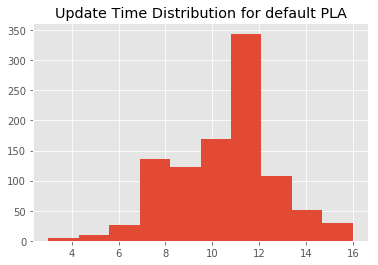

==== Answer to Question 16 ====

Median update time:  11.0
Median w_0:  -7.0




In [6]:
# Plot the distrubtion of Question 16-17, the mean and median
plt.hist(q16_updates, bins=10)
plt.title("Update Time Distribution for default PLA")
plt.show()
print("==== Answer to Question 16 ====\n")
print("Median update time: ", np.median(q16_updates))
print("Median w_0: ", np.median(q16_w0))
print("\n===============================\n")

### Question 18

In [24]:
# Question 18.
q18_updates, q18_w0 = pla_driver(threshold = 10)

Iteration 0 --- Updated 14 times
Iteration 100 --- Updated 12 times
Iteration 200 --- Updated 15 times
Iteration 300 --- Updated 20 times
Iteration 400 --- Updated 16 times
Iteration 500 --- Updated 4 times
Iteration 600 --- Updated 14 times
Iteration 700 --- Updated 16 times
Iteration 800 --- Updated 14 times
Iteration 900 --- Updated 17 times


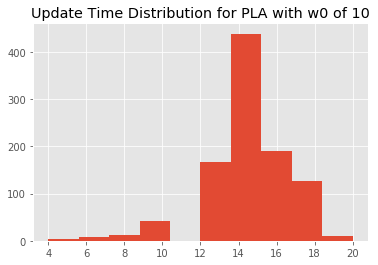

==== Answer to Question 18 ====

Median update time after threshold = 10:  15.0
Average update time after threshold = 10:  14.391




In [25]:
plt.hist(q18_updates, bins=10)
plt.title("Update Time Distribution for PLA with w0 of 10")
plt.show()

print("==== Answer to Question 18 ====\n")
print("Median update time after threshold = 10: ", np.median(q18_updates))
print("Average update time after threshold = 10: ", np.mean(q18_updates))
print("\n===============================\n")

### Question 19

In [22]:
q19_updates, q19_w0 = pla_driver(threshold=0)

Iteration 0 --- Updated 16 times
Iteration 100 --- Updated 18 times
Iteration 200 --- Updated 17 times
Iteration 300 --- Updated 18 times
Iteration 400 --- Updated 19 times
Iteration 500 --- Updated 14 times
Iteration 600 --- Updated 18 times
Iteration 700 --- Updated 18 times
Iteration 800 --- Updated 8 times
Iteration 900 --- Updated 16 times


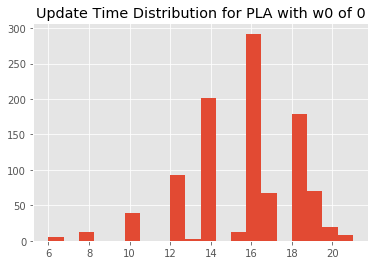

==== Answer to Question 19 ====

Median update time after threshold = 0:  16.0
Average update time after threshold = 0:  15.577




In [23]:
plt.hist(q19_updates, bins=20)
plt.title("Update Time Distribution for PLA with w0 of 0")
plt.show()

print("==== Answer to Question 19 ====\n")
print("Median update time after threshold = 0: ", np.median(q19_updates))
print("Average update time after threshold = 0: ", np.mean(q19_updates))
print("\n===============================\n")

### Question 20

In [28]:
# Question 20.
q20_updates, q20_w0 = pla_driver(threshold=0.0, scale=0.25)

Iteration 0 --- Updated 16 times
Iteration 100 --- Updated 16 times
Iteration 200 --- Updated 16 times
Iteration 300 --- Updated 17 times
Iteration 400 --- Updated 16 times
Iteration 500 --- Updated 17 times
Iteration 600 --- Updated 18 times
Iteration 700 --- Updated 16 times
Iteration 800 --- Updated 16 times
Iteration 900 --- Updated 19 times


==== Answer to Question 20 ====

Median update time after threshold = 0, and scaling down by 4:  16.0
Average update time after threshold = 0:  15.754
Basically nothing changes after scaling.




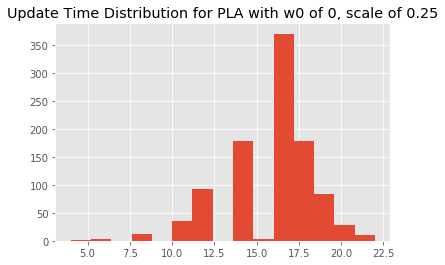

In [29]:
print("==== Answer to Question 20 ====\n")
print("Median update time after threshold = 0, and scaling down by 4: ", np.median(q20_updates))
print("Average update time after threshold = 0: ", np.mean(q20_updates))
print("Basically nothing changes after scaling.")
print("\n===============================\n")

plt.hist(q20_updates, bins=15)
plt.title("Update Time Distribution for PLA with w0 of 0, scale of 0.25")
plt.show()